In [1]:
import io
import ipywidgets as widgets
import matplotlib.pyplot as plt
import PIL.Image
import numpy as np
import urllib
from skimage.transform import resize
from matplotlib.image import imread
import os
from IPython.display import display
from skimage import io as io_url
import cv2
import numpy as np
from PIL import Image

In [41]:
# Create image widgets
image3_spatial = widgets.Image(format='png', width=500, height=500, description='Spatial')
image3_freq    = widgets.Image(format='png', width=500, height=500, description='Frequency')
sidebyside     = widgets.HBox([image3_spatial, image3_freq])

# Create slider/select widgets
slider_inner   = widgets.FloatSlider(value=0,      min=0, max=1,      step=0.01, description='Inner radius')
slider_outer   = widgets.FloatSlider(value=1.44/2, min=0, max=1.44/2, step=0.01, description='Outer radius')

buf            = io.BytesIO()

orig_img = io_url.imread('https://img2.zergnet.com/2309662_300.jpg')
orig_img = np.mean(orig_img, -1)

x = np.fft.fftfreq(orig_img.shape[0]);
y = np.fft.fftfreq(orig_img.shape[1]);

xv, yv = np.meshgrid(x, y)
xv = np.fft.fftshift(xv)
yv = np.fft.fftshift(yv)

def filter_frequency(orig_img, mask):
  # You need to implement this function
  fft_img = np.fft.fft2(orig_img)

  shifted_img = np.fft.fftshift(fft_img)

  f_img = shifted_img * mask

  shifted_back_img = np.fft.ifftshift(f_img)

  img = np.fft.ifft2(shifted_back_img)

  return f_img, img

def on_value_change3(change):
    mask = (np.sqrt(xv**2 + yv**2) < slider_outer.value) & \
           (np.sqrt(xv**2 + yv**2) >= slider_inner.value)
    mask = np.float32(mask)

    fimg, img = filter_frequency(orig_img, mask)
    buf.seek(0)
    tmp = PIL.Image.fromarray((255*img/(img.max()+0.0001)).astype(np.uint8))
    tmp = tmp.convert('L')
    tmp.save(buf, 'png')
    image3_spatial.value = buf.getvalue()

    buf.seek(0)
    tmp = PIL.Image.fromarray((255*np.log(0.0001*fimg + 1)).astype(np.uint8))
    tmp = tmp.convert('L')
    tmp.save(buf, 'png')
    image3_freq.value = buf.getvalue()


slider_inner.observe(on_value_change3, names='value')
slider_outer.observe(on_value_change3, names='value')

on_value_change3(0)

display(sidebyside)
display(slider_inner)
display(slider_outer)

<ipython-input-41-c6994a4b2abf>:67: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp = PIL.Image.fromarray((255*img/(img.max()+0.0001)).astype(np.uint8))
<ipython-input-41-c6994a4b2abf>:73: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp = PIL.Image.fromarray((255*np.log(0.0001*fimg + 1)).astype(np.uint8))


FloatSlider(value=0.0, description='Inner radius', max=1.0, step=0.01)

FloatSlider(value=0.72, description='Outer radius', max=0.72, step=0.01)

<ipython-input-41-c6994a4b2abf>:67: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp = PIL.Image.fromarray((255*img/(img.max()+0.0001)).astype(np.uint8))
<ipython-input-41-c6994a4b2abf>:73: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp = PIL.Image.fromarray((255*np.log(0.0001*fimg + 1)).astype(np.uint8))
<ipython-input-41-c6994a4b2abf>:67: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp = PIL.Image.fromarray((255*img/(img.max()+0.0001)).astype(np.uint8))
<ipython-input-41-c6994a4b2abf>:73: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp = PIL.Image.fromarray((255*np.log(0.0001*fimg + 1)).astype(np.uint8))
<ipython-input-41-c6994a4b2abf>:67: ComplexWarning: Casting complex values to real discards the imaginary part
  tmp = PIL.Image.fromarray((255*img/(img.max()+0.0001)).astype(np.uint8))
<ipython-input-41-c6994a4b2abf>:73: ComplexWarning: Casting complex 

In [49]:
def read_img(img_path, img_size=(512, 512)):
  """
    + Đọc ảnh
    + Chuyển thành grayscale
    + Thay đổi kích thước ảnh thành img_size
  """
  img = cv2.imread(img_path, 0)
  img = cv2.resize(img, dsize=img_size)
  return img


def create_hybrid_img(img1, img2, r):
  # You need to implement the function

  fft_img1 = np.fft.fft2(img1)
  fft_img2 = np.fft.fft2(img2)

  shifted_img1 = np.fft.fftshift(fft_img1)
  shifted_img2 = np.fft.fftshift(fft_img2)

  rows, cols = shifted_img1.shape
  mask = np.zeros((rows, cols))
  center_row, center_col = rows // 2, cols // 2
  y, x = np.ogrid[:rows, :cols]
  mask = (x - center_col) ** 2 + (y - center_row) ** 2 <= r ** 2

  f_hybrid = mask * shifted_img1 + (1 - mask) * shifted_img2

  f_hybrid_back = np.fft.ifftshift(f_hybrid)

  hybrid_img = np.real(np.fft.ifft2(f_hybrid_back))

  return hybrid_img

(-0.5, 511.5, 511.5, -0.5)

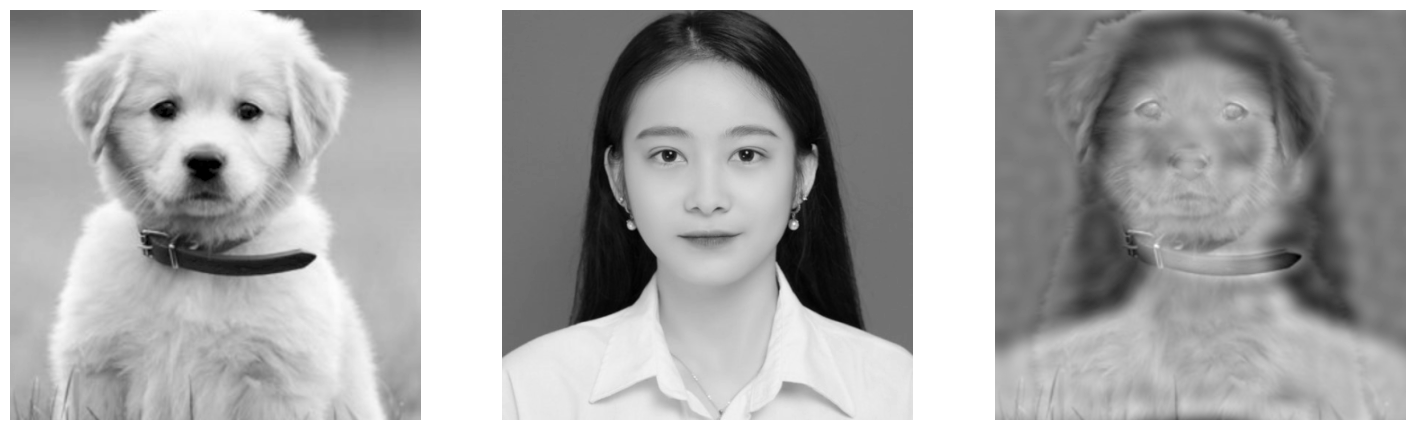

In [50]:
image_1_path = "/content/dog.png" # <-- need to change
image_2_path = "/content/people.png" # <-- need to change
img_1 = read_img(image_1_path)
img_2 = read_img(image_2_path)
hybrid_img = create_hybrid_img(img_2, img_1, 14)
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 15))
axes[0].imshow(img_1, cmap="gray")
axes[0].axis("off")
axes[1].imshow(img_2, cmap="gray")
axes[1].axis("off")
axes[2].imshow(hybrid_img, cmap="gray")
axes[2].axis("off")